<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Estudo-1" data-toc-modified-id="Estudo-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Estudo 1</a></span><ul class="toc-item"><li><span><a href="#Read-Dataset" data-toc-modified-id="Read-Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Read Dataset</a></span></li><li><span><a href="#Make-Stationary" data-toc-modified-id="Make-Stationary-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Make Stationary</a></span></li><li><span><a href="#Autocorrelation" data-toc-modified-id="Autocorrelation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Autocorrelation</a></span></li><li><span><a href="#Time-Series-to-Supervised-Learning" data-toc-modified-id="Time-Series-to-Supervised-Learning-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Time Series to Supervised Learning</a></span></li><li><span><a href="#Feature-Importance-of-Lag-Variables" data-toc-modified-id="Feature-Importance-of-Lag-Variables-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Feature Importance of Lag Variables</a></span></li><li><span><a href="#Feature-Selection-of-Lag-Variables" data-toc-modified-id="Feature-Selection-of-Lag-Variables-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Feature Selection of Lag Variables</a></span></li></ul></li><li><span><a href="#Estudo-2" data-toc-modified-id="Estudo-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Estudo 2</a></span><ul class="toc-item"><li><span><a href="#Read-Dataset" data-toc-modified-id="Read-Dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Read Dataset</a></span></li><li><span><a href="#Check-if-ID-is-unique" data-toc-modified-id="Check-if-ID-is-unique-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Check if ID is unique</a></span></li><li><span><a href="#have-a-look-at-the-distribution-of-log-price¶" data-toc-modified-id="have-a-look-at-the-distribution-of-log-price¶-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>have a look at the distribution of log price¶</a></span></li><li><span><a href="#Time-Analysis" data-toc-modified-id="Time-Analysis-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Time Analysis</a></span></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Missing values</a></span><ul class="toc-item"><li><span><a href="#Remove-columns-with-more-than-20%-missings" data-toc-modified-id="Remove-columns-with-more-than-20%-missings-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Remove columns with more than 20% missings</a></span></li></ul></li><li><span><a href="#Feature-selection-by-correlation" data-toc-modified-id="Feature-selection-by-correlation-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Feature selection by correlation</a></span></li><li><span><a href="#Correlation-between-target-and-log_price" data-toc-modified-id="Correlation-between-target-and-log_price-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Correlation between target and log_price</a></span></li><li><span><a href="#correlation-between-features" data-toc-modified-id="correlation-between-features-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>correlation between features</a></span></li><li><span><a href="#Feature-selection-by-xgb" data-toc-modified-id="Feature-selection-by-xgb-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Feature selection by xgb</a></span></li><li><span><a href="#Recursive-feature-seletion" data-toc-modified-id="Recursive-feature-seletion-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Recursive feature seletion</a></span></li></ul></li></ul></div>

# Estudo 1

Refs: https://machinelearningmastery.com/feature-selection-time-series-forecasting-python/

## Read Dataset

     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


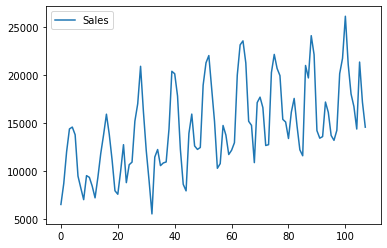

In [56]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
series = read_csv('data/monthly-car-sales.csv')
# display first few rows
print(series.head(5))
# line plot of dataset
series.plot()
pyplot.show()

In [57]:
series.index = series.Month

In [58]:
series = series.drop('Month', axis=1)

## Make Stationary

A time series with seasonality and trend removed is called stationary.



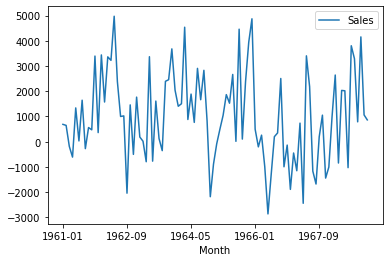

In [59]:
# seasonal difference
differenced = series.diff(12)
# trim off the first year of empty data
differenced = differenced[12:]
# save differenced dataset to file
differenced.to_csv('data/seasonally_adjusted.csv', index=True)
# plot differenced dataset
differenced.plot()
pyplot.show()

In [60]:
differenced

,Sales
Month,
1961-01,687.0
1961-02,646.0
1961-03,-189.0
1961-04,-611.0
1961-05,1339.0
...,...
1968-08,3288.0
1968-09,787.0
1968-10,4155.0


## Autocorrelation

Time series features are selected based on their correlation with the output variable. These show the correlation of each lagged observation and whether or not the correlation is statistically significant.

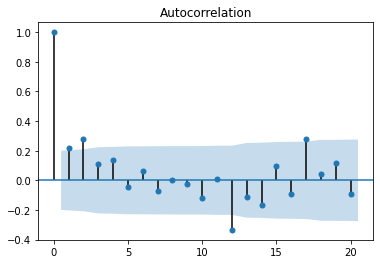

In [63]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
series = read_csv('data/seasonally_adjusted.csv', index_col='Month')
plot_acf(series)
pyplot.show()

The plot shows significant lag values at 1, 2, 12, and 17 months.



## Time Series to Supervised Learning


In [74]:
from pandas import read_csv
from pandas import DataFrame
# load dataset
series = read_csv('data/seasonally_adjusted.csv', index_col = 'Month' )

# reframe as supervised learning
dataframe = DataFrame()
for i in range(12,0,-1):
    dataframe['t-'+str(i)] = series.Sales.shift(i)
dataframe['t'] = series.values
print(dataframe.head(13))
dataframe = dataframe[13:]
# # save to new file
dataframe.to_csv('data/lags_12months_features.csv', index=False)

          t-12   t-11   t-10    t-9     t-8     t-7     t-6     t-5     t-4  \
Month                                                                         
1961-01    NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN     NaN   
1961-02    NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN     NaN   
1961-03    NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN     NaN   
1961-04    NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN     NaN   
1961-05    NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN   687.0   
1961-06    NaN    NaN    NaN    NaN     NaN     NaN     NaN   687.0   646.0   
1961-07    NaN    NaN    NaN    NaN     NaN     NaN   687.0   646.0  -189.0   
1961-08    NaN    NaN    NaN    NaN     NaN   687.0   646.0  -189.0  -611.0   
1961-09    NaN    NaN    NaN    NaN   687.0   646.0  -189.0  -611.0  1339.0   
1961-10    NaN    NaN    NaN  687.0   646.0  -189.0  -611.0  1339.0    30.0   
1961-11    NaN    NaN  687.0  646.0  -189.0  -611.0 

## Feature Importance of Lag Variables


[0.21642244 0.06271259 0.05662302 0.05543768 0.07155573 0.08478599
 0.07699371 0.05366735 0.1033234  0.04897883 0.1066669  0.06283236]


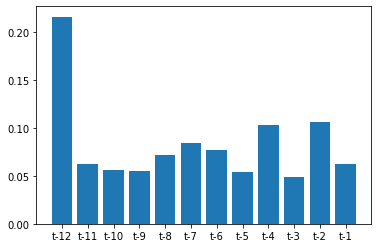

In [75]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# load data
dataframe = read_csv('data/lags_12months_features.csv', header=0)
array = dataframe.values
# split into input and output
X = array[:,0:-1]
y = array[:,-1]
# fit random forest model
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)
# show importance scores
print(model.feature_importances_)
# plot importance scores
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, model.feature_importances_)
pyplot.xticks(ticks, names)
pyplot.show()

The plot shows the high relative importance of the observation at t-12 and, to a lesser degree, the importance of observations at t-2 and t-4.

## Feature Selection of Lag Variables

Selected Features:
t-12
t-6
t-4
t-2


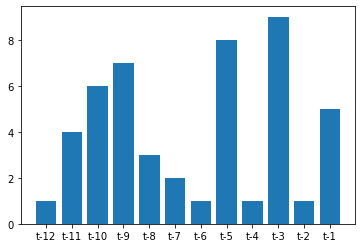

In [78]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# load dataset
dataframe = read_csv('data/lags_12months_features.csv', header=0)
# separate into input and output variables
array = dataframe.values
X = array[:,0:-1]
y = array[:,-1]
# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), 4)
fit = rfe.fit(X, y)
# report selected features
print('Selected Features:')
names = dataframe.columns.values[0:-1]
for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
# plot feature rank
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, fit.ranking_)
pyplot.xticks(ticks, names)
pyplot.show()

# Estudo 2

Ref2: https://www.kaggle.com/creatrol/basic-time-series-analysis-feature-selection

In [89]:
# import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import xgboost as xgb
from sklearn import model_selection, preprocessing
color = sns.color_palette()
%matplotlib inline
# result transform
def num2log(arr):
    return np.log(arr + 1)
# result retransform
def log2num(arr):
    return np.exp(arr) - 1
# treat date
def trans_date(arr): 
    return datetime.datetime.strptime(arr, '%Y-%m-%d').date()

## Read Dataset

In [86]:
train_df = pd.read_csv('data/train.csv')
print('In trainset, there are {} rows and {} columns'.format(train_df.shape[0],train_df.shape[1]))
train_df.head()

In trainset, there are 30471 rows and 292 columns


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


## Check if ID is unique

In [87]:
print('check if id is unique: ' + str(len(pd.unique(train_df.id)) == train_df.shape[0]))

check if id is unique: True


## have a look at the distribution of log price¶


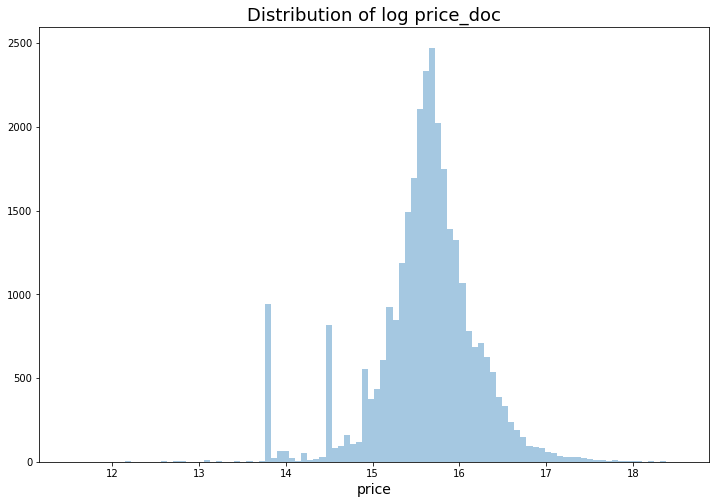

In [90]:
plt.figure(figsize=(12,8))
sns.distplot(num2log(train_df.price_doc.values), bins=100, kde=False)
plt.xlabel('price', fontsize=14)
plt.title('Distribution of log price_doc', fontsize = 18)
plt.show()

## Time Analysis


derive column month# and month to see the trend and periodic charateristics



In [91]:
train_df['date'] = train_df['timestamp'].apply(trans_date)
train_df['year'] = train_df.date.apply(lambda x: x.year)
train_df['month_num'] = train_df.date.apply(lambda x: x.month + 12*(x.year-2011))
train_df['month'] = train_df.date.apply(lambda x: x.month)
start_date = train_df.date.min()
train_df['diff_date'] = train_df['date'].apply(lambda x: (x - start_date).days)
train_df['log_price'] = num2log(train_df.price_doc.values)

In [93]:
month_num_count

,month_num,Count
0,8,3
1,9,39
2,10,213
3,11,259
4,12,239
5,13,257
6,14,364
7,15,380
8,16,300
9,17,297


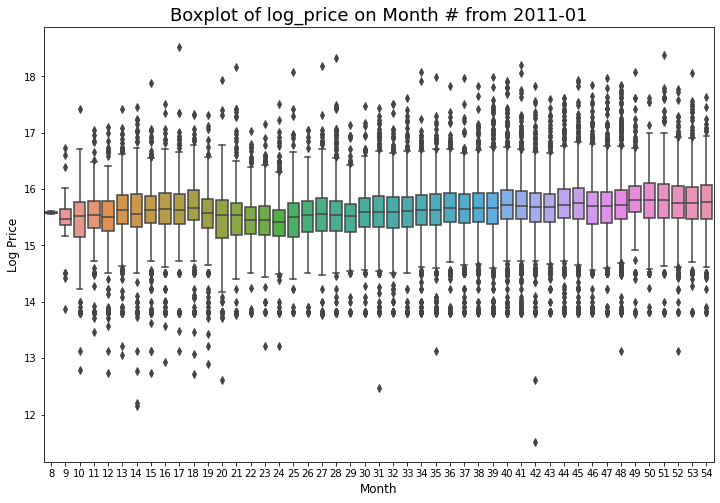

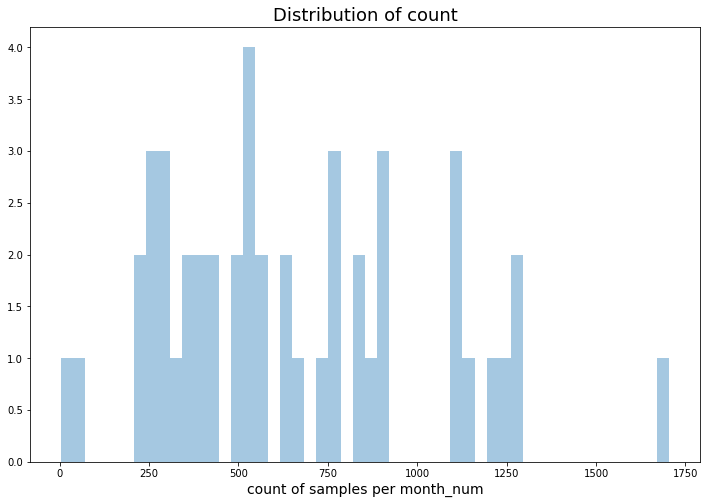

In [94]:
month_num_count = train_df.groupby('month_num').count().reset_index()
month_num_count = train_df.groupby('month_num').size().reset_index()
month_num_count.columns = ['month_num', 'Count']

plt.figure(figsize=(12,8))
sns.boxplot(x = 'month_num', y = 'log_price', data = train_df)
plt.ylabel('Log Price', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Boxplot of log_price on Month # from 2011-01', fontsize = 18)
plt.show()

plt.figure(figsize=(12,8))
sns.distplot(month_num_count.Count.values, bins=50, kde=False)
plt.xlabel('count of samples per month_num', fontsize=14)
plt.title('Distribution of count', fontsize = 18)
plt.show()

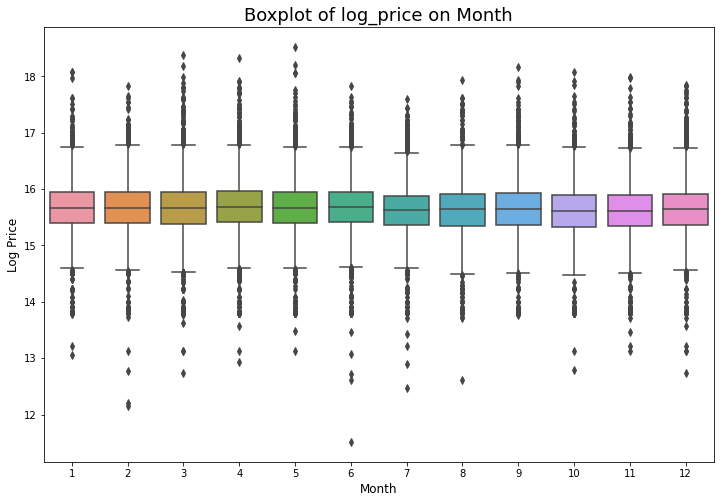

In [95]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'month', y = 'log_price', data = train_df)
plt.ylabel('Log Price', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Boxplot of log_price on Month', fontsize = 18)
plt.show()

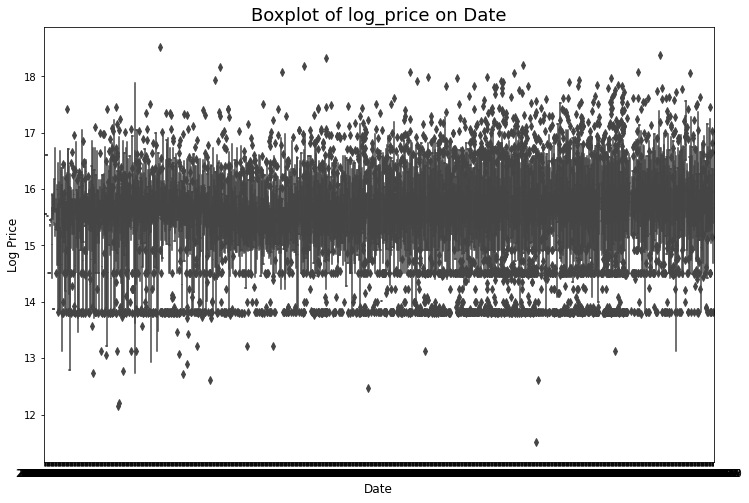

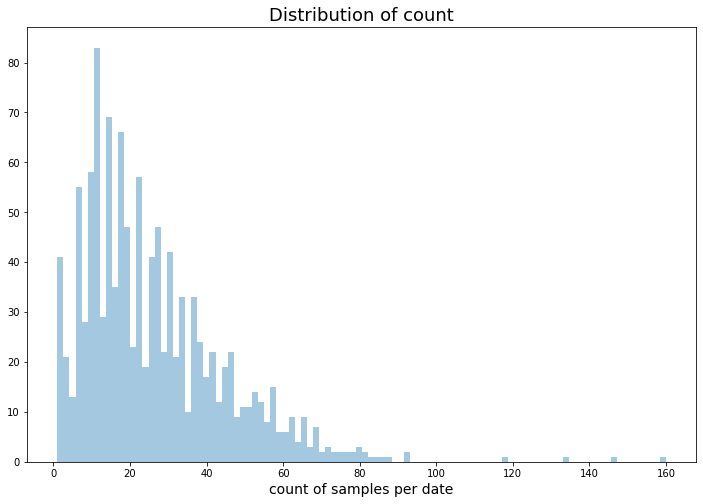

In [96]:
date_count = train_df.groupby('date').count().reset_index()
date_count = train_df.groupby('date').size().reset_index()
date_count.columns = ['date', 'Count']
plt.figure(figsize=(12,8))
sns.boxplot(x = 'date', y = 'log_price', data = train_df)
plt.ylabel('Log Price', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Boxplot of log_price on Date', fontsize = 18)
plt.show()
plt.figure(figsize=(12,8))
sns.distplot(date_count.Count.values, bins=100, kde=False)
plt.xlabel('count of samples per date', fontsize=14)
plt.title('Distribution of count', fontsize = 18)
plt.show()

## Missing values

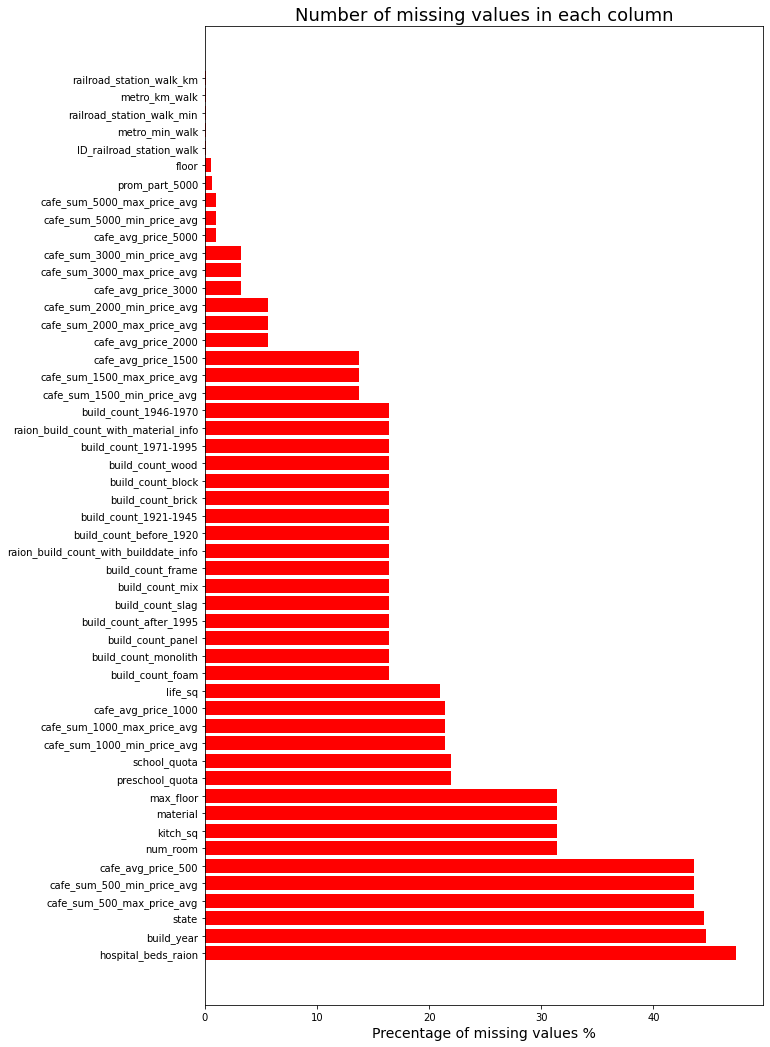

In [97]:
missing = train_df.isnull().sum(0).reset_index()
missing.columns = ['column', 'count']
missing = missing.sort_values(by = 'count', ascending = False).loc[missing['count'] > 0]
missing['percentage'] = missing['count'] / float(train_df.shape[0]) * 100
ind = np.arange(missing.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(10,18))
rects = ax.barh(ind, missing.percentage.values, color='r')
ax.set_yticks(ind)
ax.set_yticklabels(missing.column.values, rotation='horizontal')
ax.set_xlabel("Precentage of missing values %", fontsize = 14)
ax.set_title("Number of missing values in each column", fontsize = 18)
plt.show()

### Remove columns with more than 20% missings

In [98]:
delete_col = missing.loc[missing['percentage'] >= 20].column.values
train_set = train_df.drop(delete_col, axis=1)

## Feature selection by correlation

In [101]:
for f in train_set.columns:
    if train_set[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_set[f].values)) 
        train_set[f] = lbl.transform(list(train_set[f].values))
dtype_df = train_set.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,178
1,float64,104


In [102]:
train_set.head()

,id,timestamp,full_sq,floor,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,...,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,date,year,month_num,month,diff_date,log_price
0,1,0,43,4.0,0,9,6.407578e+06,155572,0.189727,0.000070,...,0,52,4,5850000,0,2011,8,8,0,15.581952
1,2,1,34,3.0,0,70,9.589337e+06,115352,0.372602,0.049637,...,10,66,14,6000000,1,2011,8,8,3,15.607270
2,3,2,43,2.0,0,129,4.808270e+06,101708,0.112560,0.118537,...,4,67,10,5700000,2,2011,8,8,7,15.555977
3,4,3,89,9.0,0,65,1.258354e+07,178473,0.194703,0.069753,...,0,26,3,13100000,3,2011,9,9,12,16.388123
4,5,4,77,4.0,0,6,8.398461e+06,108171,0.015234,0.037316,...,91,195,14,16331452,4,2011,9,9,16,16.608603


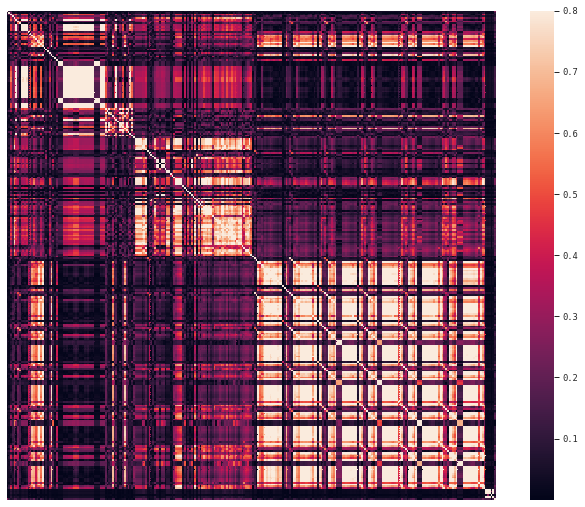

In [103]:
corrmat = train_set.drop(["id", "timestamp", "price_doc"], axis=1).corr(method='pearson', min_periods=1000)
# plot absolute values
corrmat = np.abs(corrmat)
sns.set(context="paper", font="monospace")
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, xticklabels = False, yticklabels = False)

## Correlation between target and log_price

In [109]:
corrmat

,full_sq,floor,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_education_centers_raion,...,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,date,year,month_num,month,diff_date,log_price
full_sq,1.000000,0.089649,0.100806,0.016169,0.056303,0.038929,0.030836,0.053589,0.025619,0.010669,...,0.021568,0.030218,0.001580,0.041254,0.021642,0.023495,0.021769,0.008577,0.021735,0.271408
floor,0.089649,1.000000,0.206810,0.034209,0.019448,0.046933,0.001063,0.017861,0.012001,0.013214,...,0.012256,0.044236,0.102101,0.123843,0.014687,0.016694,0.014557,0.008936,0.014477,0.118224
product_type,0.100806,0.206810,1.000000,0.310170,0.440410,0.558609,0.250278,0.107163,0.481760,0.459099,...,0.095600,0.052517,0.366287,0.469158,0.087664,0.067744,0.087806,0.054100,0.088058,0.057150
sub_area,0.016169,0.034209,0.310170,1.000000,0.185334,0.248227,0.103547,0.133794,0.241725,0.259906,...,0.017583,0.071115,0.084696,0.109449,0.035551,0.028438,0.035563,0.018627,0.035592,0.075987
area_m,0.056303,0.019448,0.440410,0.185334,1.000000,0.404654,0.500216,0.244546,0.346649,0.421462,...,0.086786,0.195067,0.416222,0.449849,0.069357,0.058947,0.069578,0.025584,0.069503,0.156493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
year,0.023495,0.016694,0.067744,0.028438,0.058947,0.037303,0.055094,0.020285,0.032545,0.041725,...,0.044506,0.014408,0.019076,0.030281,0.950655,1.000000,0.952480,0.283392,0.952522,0.147206
month_num,0.021769,0.014557,0.087806,0.035563,0.069578,0.049139,0.061801,0.025119,0.042964,0.054243,...,0.048554,0.013940,0.027038,0.041250,0.999625,0.952480,1.000000,0.022188,0.999666,0.145404
month,0.008577,0.008936,0.054100,0.018627,0.025584,0.032274,0.013747,0.012508,0.028449,0.033829,...,0.006789,0.003399,0.022513,0.030484,0.027001,0.283392,0.022188,1.000000,0.021001,0.025368
diff_date,0.021735,0.014477,0.088058,0.035592,0.069503,0.049504,0.061869,0.025047,0.043304,0.054559,...,0.048554,0.013995,0.027032,0.041410,0.999970,0.952522,0.999666,0.021001,1.000000,0.145438


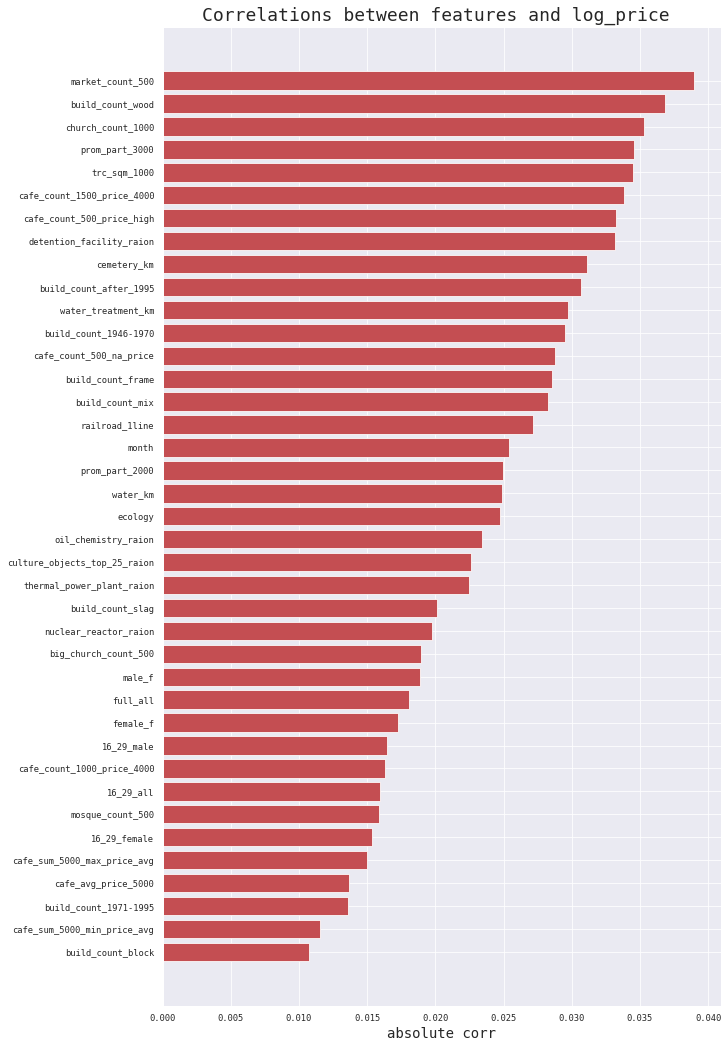

In [110]:
remain_num = 50
corr_target = corrmat['log_price'].reset_index()[:-2]
corr_target.columns = ['feature','abs_corr']
corr_target = corr_target.sort_values(by = 'abs_corr', ascending = True)[:remain_num].loc[corr_target['abs_corr'] >0.01]
ind = np.arange(corr_target.shape[0])

width = 0.9
fig, ax = plt.subplots(figsize=(10,18))
rects = ax.barh(ind, corr_target.abs_corr.values, color='r')
ax.set_yticks(ind)
ax.set_yticklabels(corr_target.feature.values, rotation='horizontal')
ax.set_xlabel("absolute corr", fontsize = 14)
ax.set_title("Correlations between features and log_price ", fontsize = 18)
plt.show()

In [111]:
corr_target_f = list(corr_target.feature.values)

## correlation between features


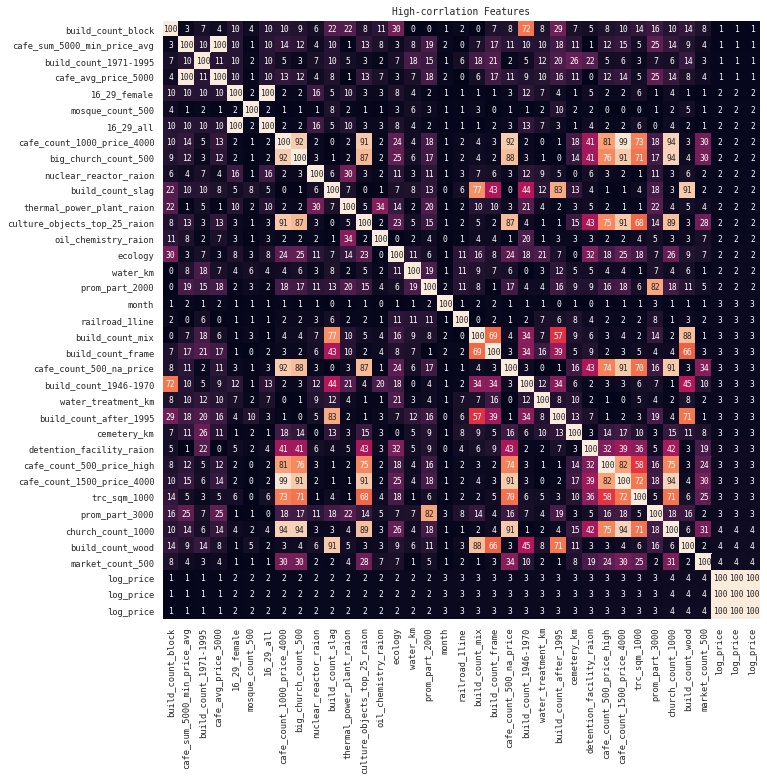

In [115]:
corr_target_f2 = corr_target_f
corr_target_f2.append('log_price')
high_corr = train_set[corr_target_f2].corr(method='pearson', min_periods=1000)
high_corr = np.abs(high_corr)*100
f, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(high_corr, cbar=False, annot=True, square=True, fmt='.0f', 
            annot_kws={'size': 8})
plt.title('High-corrlation Features')
plt.show()

Remove duplicated features

In [113]:
remove_list = ['cafe_sum_5000_max_price_avg','16_29_male', 'female_f','full_all', 'male_f']
corr_target_f = [x for x in corr_target_f if x not in remove_list]

In [136]:
train_df[corr_target_f]

,build_count_block,cafe_sum_5000_min_price_avg,build_count_1971-1995,cafe_avg_price_5000,16_29_female,mosque_count_500,16_29_all,cafe_count_1000_price_4000,big_church_count_500,nuclear_reactor_raion,...,cafe_count_500_price_high,cafe_count_1500_price_4000,trc_sqm_1000,prom_part_3000,church_count_1000,build_count_wood,market_count_500,log_price,log_price,log_price
0,25.0,708.57,206.0,947.14,8083,0,17508,0,0,no,...,0,0,55600,13.55,2,0.0,0,15.581952,15.581952,15.581952
1,83.0,673.81,84.0,911.31,7593,0,15164,1,0,no,...,0,1,94065,27.32,2,1.0,0,15.607270,15.607270,15.607270
2,59.0,702.68,63.0,949.55,10356,0,19401,0,0,no,...,0,0,0,26.46,1,0.0,0,15.555977,15.555977,15.555977
3,9.0,931.58,130.0,1242.11,1842,0,3292,0,0,no,...,0,0,80780,3.57,0,51.0,0,16.388123,16.388123,16.388123
4,48.0,853.88,62.0,1132.66,2581,0,5164,2,1,no,...,0,6,158200,8.62,12,0.0,0,16.608603,16.608603,16.608603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,35.0,689.95,246.0,923.02,6229,0,11588,0,0,no,...,0,0,79970,21.25,1,0.0,0,15.816991,15.816991,15.816991
30467,19.0,887.43,71.0,1175.16,11989,0,23480,1,0,no,...,0,6,89090,11.35,8,27.0,0,17.034386,17.034386,17.034386
30468,NaN,747.37,NaN,1005.26,1762,0,3796,0,0,no,...,0,0,0,2.11,0,NaN,0,15.757264,15.757264,15.757264
30469,38.0,703.20,36.0,942.92,8437,0,15835,0,0,no,...,0,0,0,1.47,5,0.0,0,16.418200,16.418200,16.418200


## Feature selection by xgb

In [117]:
train_y = train_set.log_price.values
train_X = train_set.drop(["id", "timestamp", "price_doc", "log_price"], axis=1)
xgb_params = {
    'eta': 0.05,
    'max_depth': 10,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)
remain_num = 99

[22:41:36] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:41:36] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:42:10] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


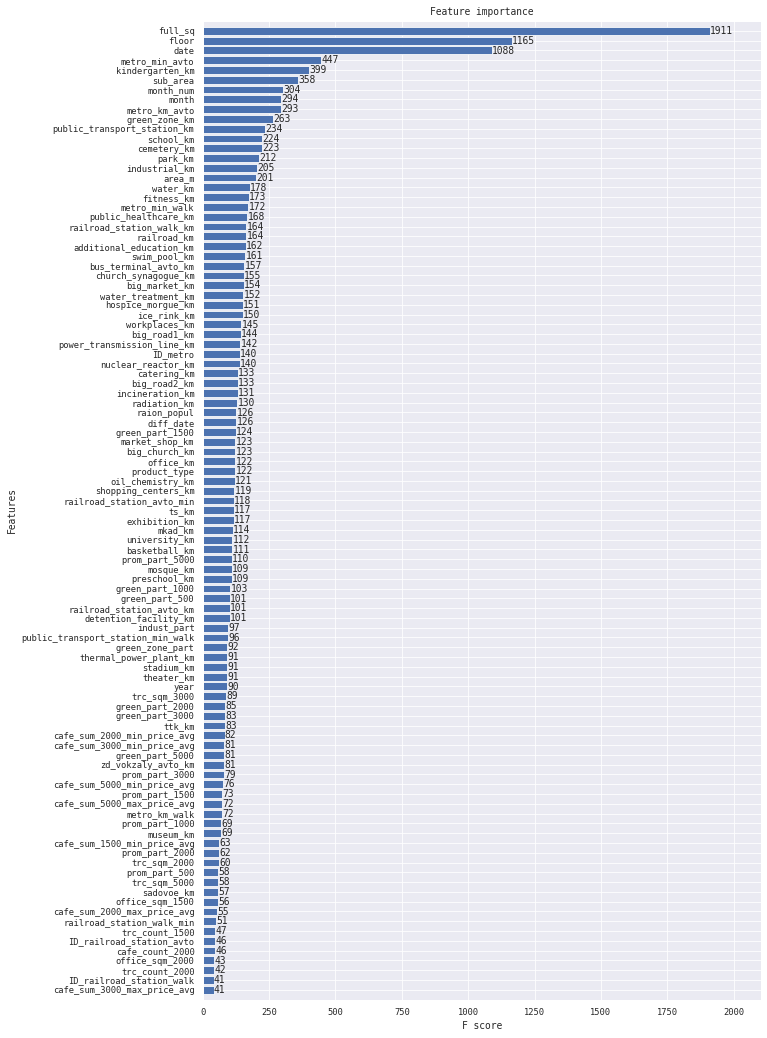

In [118]:
fig, ax = plt.subplots(figsize=(10,18))
xgb.plot_importance(model, max_num_features=remain_num, height=0.8, ax=ax)
plt.show()

## Recursive feature seletion 

In [119]:
train_set.head()

,id,timestamp,full_sq,floor,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,...,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,date,year,month_num,month,diff_date,log_price
0,1,0,43,4.0,0,9,6.407578e+06,155572,0.189727,0.000070,...,0,52,4,5850000,0,2011,8,8,0,15.581952
1,2,1,34,3.0,0,70,9.589337e+06,115352,0.372602,0.049637,...,10,66,14,6000000,1,2011,8,8,3,15.607270
2,3,2,43,2.0,0,129,4.808270e+06,101708,0.112560,0.118537,...,4,67,10,5700000,2,2011,8,8,7,15.555977
3,4,3,89,9.0,0,65,1.258354e+07,178473,0.194703,0.069753,...,0,26,3,13100000,3,2011,9,9,12,16.388123
4,5,4,77,4.0,0,6,8.398461e+06,108171,0.015234,0.037316,...,91,195,14,16331452,4,2011,9,9,16,16.608603


In [138]:
train_set_t = train_set.fillna(0)
# train_set_t = train_set.drop(["id", "timestamp", "price_doc"])
train_set_t = train_set_t[corr_target_f]

Selected Features:
16_29_female
16_29_all
log_price
log_price


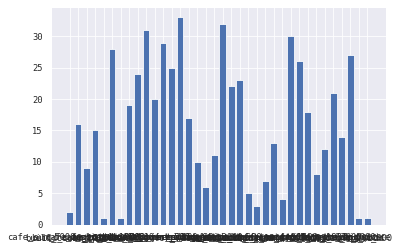

In [140]:

array = train_set_t.values
X = array[:,0:-1]
y = array[:,-1]
# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), 4)
fit = rfe.fit(X, y)
# report selected features
print('Selected Features:')
names = train_set_t.columns.values[0:-1]
for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
# plot feature rank
names = train_set_t.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, fit.ranking_)
pyplot.xticks(ticks, names)
pyplot.show()